In [183]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

COLORS = sns.color_palette('pastel', 5)
sns.set_palette(COLORS) 

## Создание и визуализация графов

#### Создадим ориентированный граф

In [184]:
G = nx.DiGraph()    # пустой ориентированный граф

In [185]:
# добавим узлы:
G.add_node('Alice')
G.add_node('Werner')
G.add_node('Friedrich')
G.nodes()

NodeView(('Alice', 'Werner', 'Friedrich'))

In [186]:
# добавим дуги (направленные ребра)
G.add_edge('Alice', 'Friedrich')
G.add_edge('Alice', 'Werner')
G.add_edge('Friedrich', 'Werner')
G.add_edge('Friedrich', 'Alice')
G.edges()

OutEdgeView([('Alice', 'Friedrich'), ('Alice', 'Werner'), ('Friedrich', 'Werner'), ('Friedrich', 'Alice')])

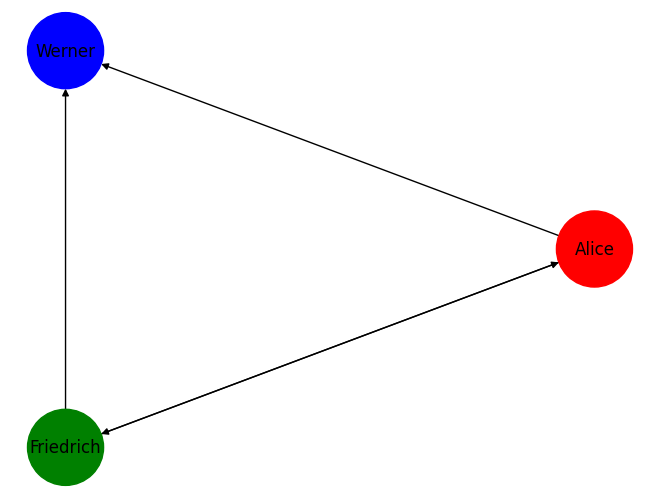

In [187]:
# функция draw_circular располагает узлы по кругу
color_map = {'Alice':'red', 'Friedrich':'blue', 'Werner':'green'}
nx.draw_circular(G, node_color=color_map.values(), node_size=3000, with_labels=True)

#### Создадим неориентированный граф из словаря

In [188]:
# словарь для узлов содержит координаты города
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))
print(positions['Albany'])

G = nx.Graph()
G.add_nodes_from(positions)       
G.nodes()

(-74, 43)


NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

In [189]:
# словарь для ребер содержит время премещения между городами
drive_time = {  ('Albany', 'Boston'): 3,
                ('Albany', 'NYC'): 4,
                ('Boston', 'NYC'): 4,
                ('NYC', 'Philly'): 2}

G.add_edges_from(drive_time)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

In [190]:
# перебор ребер графа
for edge in G.edges:
    print(edge)
    vertexA, vertexB = edge
print(type(edge))
print(type(vertexA))

('Albany', 'Boston')
('Albany', 'NYC')
('Boston', 'NYC')
('NYC', 'Philly')
<class 'tuple'>
<class 'str'>


In [191]:
print(f"{ len(G) = }")          # число узлов
print(f"{ len(G.edges) = }")    # число ребер
print(f"{ set(G)} ")            # помещаем в множество узлы графа G
print(f"{ set(G['Boston']) }")  # множество узлов, связанных с узлом Boston

 len(G) = 4
 len(G.edges) = 4
{'Philly', 'NYC', 'Albany', 'Boston'} 
{'Albany', 'NYC'}


Функция `draw()` располагает узлы в соответствии с их координатами, заданными в словаре, который передается в функцию вторым аргументом. Для отображения весов ребер вызовем функцию `draw_networkx_edge_labels()`, в которую передаются три аргумента: граф, словарь узлов и словарь ребер.

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

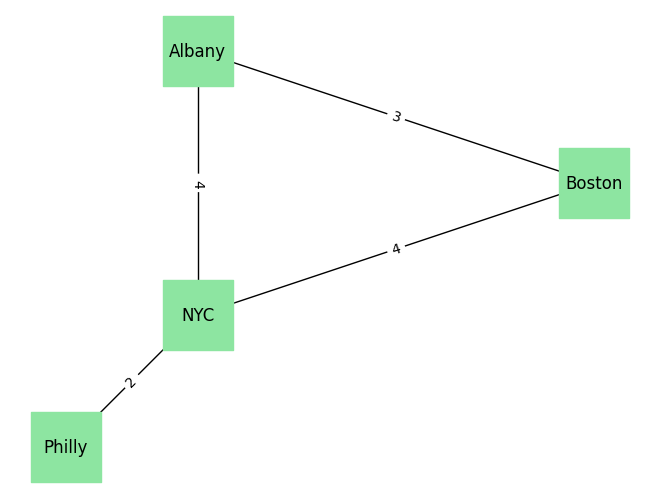

In [192]:
nx.draw(G,                      # граф
        positions,              # словарь координат вершин
        node_shape='s',         # форма изображения узла (s - square)
        node_color='C2',        # цвет узлов
        node_size=2500, with_labels=True)
nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_time)

## Модель Эрдёша-Реньи (Erdos-Renyi model)
Модель Эрдёша-Реньи позволяет генерировать случайный граф. Модель характеризуется двумя параметрами: $n$ - число узлов, $p$ - вероятность того, что две вершины связаны ребром.

Одной из особенностей таких случайно сгенериванных граф является то, что некоторые свойства графа резко меняются при добавлении новых ребер. Это касается, например, связности графа: при малом значении $p$ вероятность того, что граф получится связным (*connected*) близка к нулю, а при большом значении $p$ вероятность связности графа близка к 1. Причем переход между двумя этим режимами происходит скачкообразно вблизи некоторого значения $p^*$. Эрдёш и Реньи показали, что это критическое значение $p^* = \ln {n} / n$. Случайный граф $G(n, p)$ с высокой вероятностью будет связным, если $p < p^*$ и не будет при $p > p^*$.

#### Complete graph
Для построения завершенного (*complete*) графа будем использовать генераторную функцию, которая генерирует пары узлов:

In [193]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield v, u

In [194]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

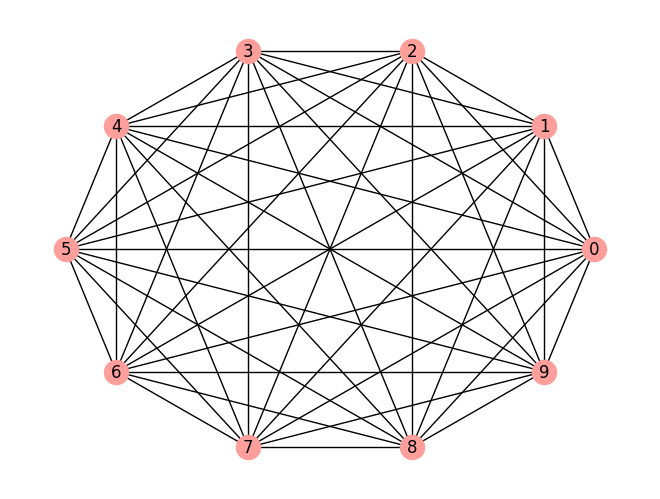

In [195]:
complete = make_complete_graph(10)
nx.draw_circular(complete, node_color='C3', with_labels=True)

Класс `Graph` предоставляет метод neighbors, возвращающий итератор, перебирающий ключи соседних узлов

In [196]:
complete.neighbors(0)           # соседи узла 0
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

#### Generating ER graphs

In [197]:
def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j and flip(p):
                yield u, v

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [198]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

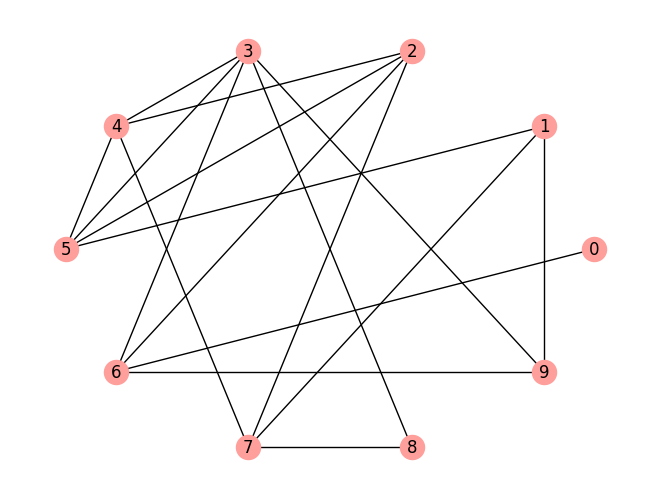

In [199]:
nx.draw_circular(random_graph, node_color='C3', with_labels=True)

#### Connectivity
Для того чтобы проверить, является ли граф связным, можно начать с произвольного узла и проверить достижимость до остальных узлов. Если есть путь до узла $v$, то есть путь и до соседей узла $v$. Сделать это можно путем поиска в глубину (DFS) или поиском в ширину (BFS).

Deepth-First Search (DFS)

In [200]:
def dfs(G, source):
    seen = set()
    stack = [source]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen 

Breadth-First Search (BFS)

In [201]:
from collections import deque

def bfs(G, source):
    seen = list()
    queue = deque([source])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.append(node)
            queue.extend(G.neighbors(node))
    return seen

In [202]:
dfs(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [203]:
dfs(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [204]:
def is_connected(G):
    start = next(iter(G))   
    reachable = dfs(G, start)
    return len(reachable) == len(G)

In [205]:
is_connected(complete)

True

In [206]:
is_connected(random_graph)

True

#### Probability of connectivity

In [207]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count / iters

При $n=10$ критическое значение вероятности должно быть равно $\log n / n = 0.23$

In [208]:
n = 10
pstar = np.log(n) / n

ps = np.logspace(-1.3, 0, 21)
ps

array([0.05011872, 0.05821032, 0.0676083 , 0.07852356, 0.09120108,
       0.10592537, 0.12302688, 0.1428894 , 0.16595869, 0.19275249,
       0.22387211, 0.26001596, 0.30199517, 0.35075187, 0.40738028,
       0.47315126, 0.54954087, 0.63826349, 0.74131024, 0.86099375,
       1.        ])

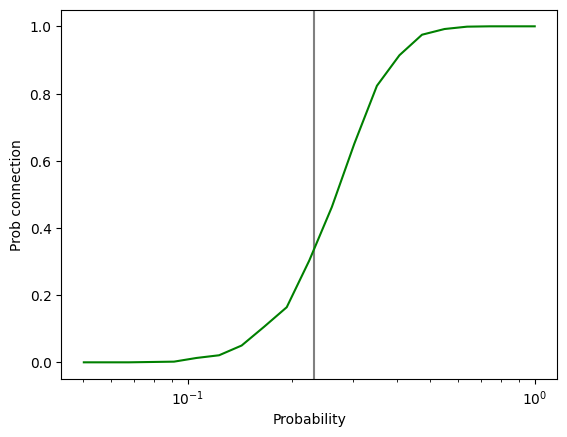

In [209]:
ys = [prob_connected(n, p, 1000) for p in ps]

plt.axvline(pstar, color='gray')
plt.xscale('log')
plt.xlabel('Probability')
plt.ylabel('Prob connection')
plt.plot(ps, ys, color='green')

## Small world graphs (Мир тесен)
Многие сети в реальном мире, включая социальные сети, обладают свойством *small world* (мир тесен), при котором средняя дистанция между вершинами является меньшим, чем ожидается.

Ваттс и Строгац использовали два вида графов в исследованиях: случайный граф и регулярный. В случайном графе узлы соединены случайным образом, в то время как в регулярном графе все узлы имеют одинаковое число соседей. Далее исследовались два свойства графов - кластеризация и длина пути.

Клика (*cluque*) - подмножество вершин графа, которые все между собой связаны; в социальной сети clique - это группа людей, которые все друг с другам дружат.<br>
Кластеризация - это мера кликальности (*cliquishness*) графа. Ваттс и Строгац определили коэффициент кластеризации как вероятность того, что два узла связанные с одним и тем же узлом окажутся также связаны между собой.

Path length (длина пути) - средняя дистанция между двумя узлами, которая соответствует степеням разделения (degrees of separation) в социальной сети.

Ваттс и Строгац показали, что регулярный граф обладает высокой кластеризацией и высокой длиной путей, в то время как случайный граф с тем же размером обычно обладает низкой кластеризацией и малой длиной путей. Так что ни одна из этих моделей не соответствует социальным сетям, в которых высокая кластеризация и с короткими путями. 

Целью исследования было создание генеративной модели социальной сети, которая объясняла бы феномен путем моделирования процесса, приводящего к этому феномену. Ваттс и Строгац предложили этот процесс для построения графа Мир тесен (Watts-Strogatz graph):
1. Начинаем с регулярного графа с $n$ узлами и каждый узел соединяем с $k$ соседями.
2. Выбирается подмножество ребер, которые удаляются с текущих позиций, и вместо них случайно вставляются другие ребра.

Вероятность, с которой ребро будет заменено определяется параметром $p$, который контролирует рандомность графа. При $p=0$ граф будет регулярным, при $p=1$ граф рандомный.

Ваттс и Строгац обнаружили, что малые значения $p$ приводят к графам с высоким значением кластеризации (как у регулярных графов) и к малым значеними длины путей (как у случайных графов).

Для повторения эксперимента Ваттса и Строгаца произведем несколько шагов:
1. Создадим граф ring lattice, который будет представлять собой разновидность регулярных графов.
2. Затем перемешаем некоторое подмножество ребер.
3. Напишем функцию, измеряющую степерь кластеризации и используем функцию NetworkX для вычисления длин путей.
4. Вычислим степень кластеризации и длины путей для разных значений $p$.
5. Представим эффективный алгоритм для вычисления кратчайших путей (алгоритм Дейкстры).

#### Ring lattice

In [210]:
def adjacent_edges(nodes, half_k):
    """Генератор ребер
    npdes: набор узлов
    half_k: значение равное половине k"""
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+half_k+1):
            v = nodes[j % n]
            yield (u, v)

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [211]:
# создадим ребра для трех узлов
nodes = range(3)
k = 2
for edge in adjacent_edges(nodes, k//2):
    print(edge)

(0, 1)
(1, 2)
(2, 0)


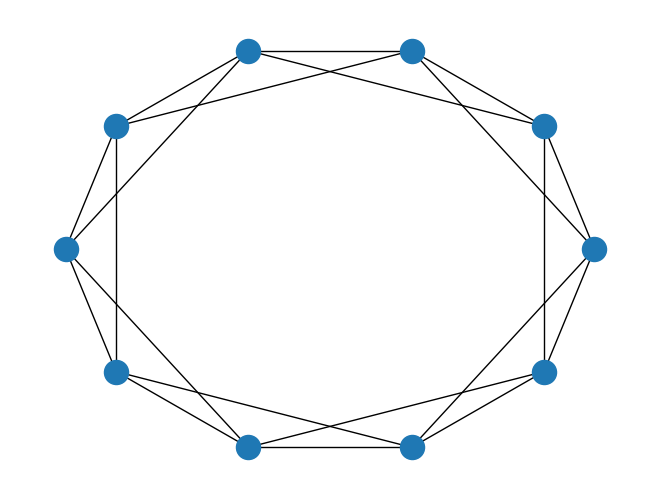

In [212]:
# создадим граф ring laggice с 10 узлами и k = 4:
lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice)

#### Watts-Strogatz (WS) graphs
Для построения такого графа перелинкуем некоторые ребра. При этом нельзя допускать петли или несколько ребер между узлами. Можно перебирать все ребра и менять их с вероятностью $p$. Если ребро подлежит переликованию, то первый его узел остается неизменным а меняется его второй узел.

In [213]:
def rewire(G, p):
    """перелинковывает второй узел ребра на другой узел с вероятностью p"""
    nodes = set(G)          # получим множество узлов
    for edge in G.edges():
        if flip(p):
            u, v = edge     # получим узлы ребра, подлежащего изменению
            # создаем множество узлов, в котором не содержится сам узел u,
            # а также его соседи и выбираем из него новый узел на замену v:
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(tuple(choices))    
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

20 20


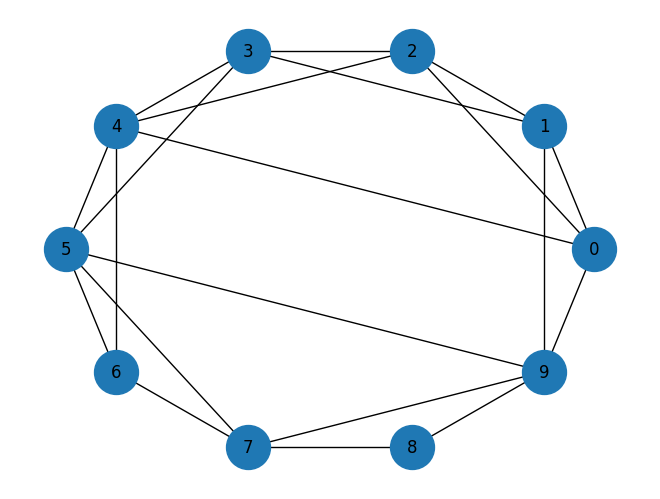

In [214]:
ws = make_ws_graph(10, 4, 0.2)
print(len(lattice.edges), len(ws.edges))
nx.draw_circular(ws, node_size=1000, 
                    with_labels=True)

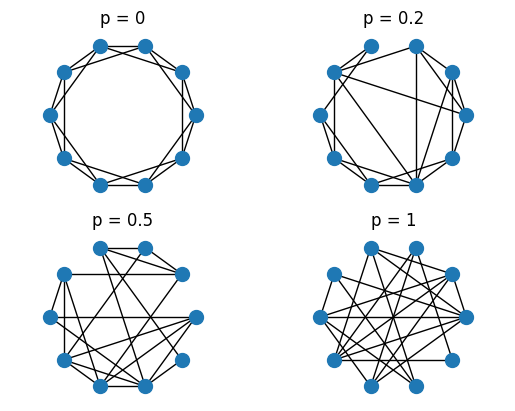

In [215]:
# Изобразим 4 графа с разными значениями p
n = 10
k = 4
p_values = (0, 0.2, 0.5, 1)

for i, p in zip((1, 2, 3, 4), p_values):
    plt.subplot(2, 2, i)
    ws = make_ws_graph(n, k, p)
    nx.draw_circular(ws, node_size=100)
    plt.axis('equal')
    plt.title(f"{p = }")

#### Измерение кластеризации графа
Clique - множество узлов, которые все между собой связаны. Предположим, что узел $u$ обадает $k$ соседями. Если бы все соседи оказались связаны друг с другом, то между ними было бы $k(k-1)/2$ ребер (`total`). Фактическое количество ребер, связывающих соседей узла $u$ будет меньше либо равно этому числу (`exist`). А отношение `exist / total` называется коэффициентом кластеризации узла $u$ и обозначается $C_u$. Если мы вычислим среднее значение $C_u$ по всем узлам, получим **средний коэффициент кластеризации сети** $C_u$.

In [216]:
def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return 0

    total = k * (k-1) / 2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist += 1
    return exist / total

def clustering_coefficient(G):
    return np.mean([node_clustering(G, node) for node in G])

In [217]:
lattice = make_ring_lattice(10, 4)
clustering_coefficient(lattice)

0.5

#### Алгоритм Дейкстры (Dijkstra)
Алгоритм позволяет получить длины кратчайших путей (*shortest path length*) от заданного узла до остальных достижимых узлов. Рассмотрим упрощенный вариант алгоритма Дейкстры для графов с одинаковой длиной всех ребер.  Более общий вариант алгоритма работает с ребрами произвольной неотрицательной длины. Алгоритм Дейкстры похож на BFS с той разницей, что вместо множества, в котором собираются достижимые узлы используется словарь, в котором формируется соответствие достижимых узлов и расстояний до них от источника.

In [218]:
def shortest_paths(G, source):
    distances = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_distance = distances[node] + 1

        neighbors = set(G[node]).difference(distances)
        for n in neighbors:
            distances[n] = new_distance
        queue.extend(neighbors)
    return distances

#### shortest_path_length
NetworkX предоставляет функцию `shortest_path_length` для получения длин кратчайших путей между парами узлов. Функция возвращает генератор. Если конвертировать в словарь, то можно будет получать значение длины кратчайшего пути для любой пары узлов. 

In [219]:
length_map = nx.shortest_path_length(G)
dict(length_map)['Albany']['Boston']

1

In [251]:
def path_lengths(G):
    """Возвращает список, содержащий длины путей для всех пар узлов графа"""
    length_map = dict(nx.shortest_path_length(G))
    lengths = [length_map[u][v] for u, v in all_pairs(G)]
    return lengths

def characteristic_path_length(G):
    """Возвращает характеристическую длину путей графа"""
    return np.mean(path_lengths(G))

In [221]:
lattice = make_ring_lattice(3, 2)
characteristic_path_length(lattice)

1.0

#### average_shortest_path_length
В NetworkX уже существует функция `average_shortest_path_length`, вычисляющая среднее значение кратчайших путей.

In [222]:
 
nx.average_shortest_path_length(lattice)

1.0

#### Эксперимент Ваттса-Строгатца (WS)
Эксперимент WS показывает, что в некотором диапазоне значений $p$ WS-граф обладает высокой кластерицацией, характерной для регулярного графа и короткими путями, характерными для случайных графов. Для начала напишем функцию, которая создает и запускает один WS-граф с заданными параметрами и возвращает значения средней длины путей (`mpl`) и коэффициент кластеризации (`cc`). 

In [223]:
def run_one_graph(n, k, p):
    ws = make_ws_graph(n, k, p)
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    return mpl, cc

run_one_graph(1000, 10, 0.5)

(3.3808348348348347, 0.0923373019137725)

Создадим логарифмическую последовательность значений $p$, для которых будем получать параметры грфов. Напишем функцию, которая посчитает средние длины путей и коэффициенты кластеризации для заданного набора $p$ и запишет их в словарь. 

In [224]:
ps = np.logspace(-4, 0, 9)

def run_experiment(ps, n=1000, k=10, iters=3):
    results = dict()
    array = np.empty((2, iters))
    total_iterations = iters * len(ps)
    current_iteration = 0
    for p in ps:
        for i in range(iters):
            mpl, cc = run_one_graph(n, k, p)
            array[0][i] = mpl
            array[1][i] = cc
            current_iteration += 1
            print(f'\r {int((current_iteration / total_iterations) * 100)} %', end='')
        results[p] = array[0].mean(), array[1].mean()
    return results

In [225]:
res = run_experiment(ps)

 100 %

In [226]:
L = []
C = []
for p, t in sorted(res.items()):
    mpl, cc = t
    L.append(mpl)
    C.append(cc)    

L = np.array(L) / L[0]
C = np.array(C) / C[0]
print(L)

[1.         0.60216489 0.67633646 0.282248   0.19540949 0.12610037
 0.09416593 0.07605338 0.06954224]


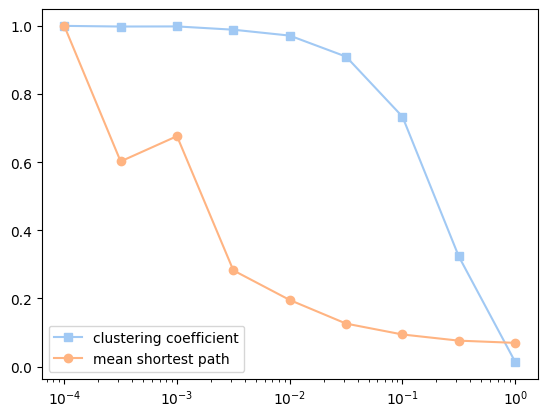

In [227]:
plt.plot(ps, C, 's-', label='clustering coefficient')
plt.plot(ps, L, 'o-', label='mean shortest path')

plt.xscale('log')
plt.legend(loc='lower left')

Из графика видно, что в некотором диапазоне значений $p$ граф обладает высоким коэффициентом кластеризации и короткими путями, что характерно для социальной сети.